# 1 - Subir archivos fastapi_app a content

# 2 - Instalar dependencias y ngrok

In [1]:
!pip install -r /content/requirements.txt pyngrok

# 3 - Iniciar servidor FastAPI con tunel ngrok

In [2]:
import uvicorn
import threading
import time
from pyngrok import ngrok

def run_fastapi():
    uvicorn.run("main:app", host="0.0.0.0", port=8000)

# Iniciar FastAPI en un hilo separado
fastapi_thread = threading.Thread(target=run_fastapi, daemon=True)
fastapi_thread.start()

# Esperar unos segundos para que el servidor se inicie
time.sleep(30)

# Autenticación con tu token de Ngrok (solo se ejecuta una vez)
!ngrok authtoken +++++++++++++++ #Token

# Exponer el puerto 8000
ngrok_tunnel = ngrok.connect(8000)
print(f"FastAPI está disponible en: {ngrok_tunnel.public_url}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu
Device set to use cpu
No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline witho

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
FastAPI está disponible en: https://09a3-34-58-87-209.ngrok-free.app


# 4 - Acceder a la API y a los docs

 URL_GENERADA/docs

- Docs

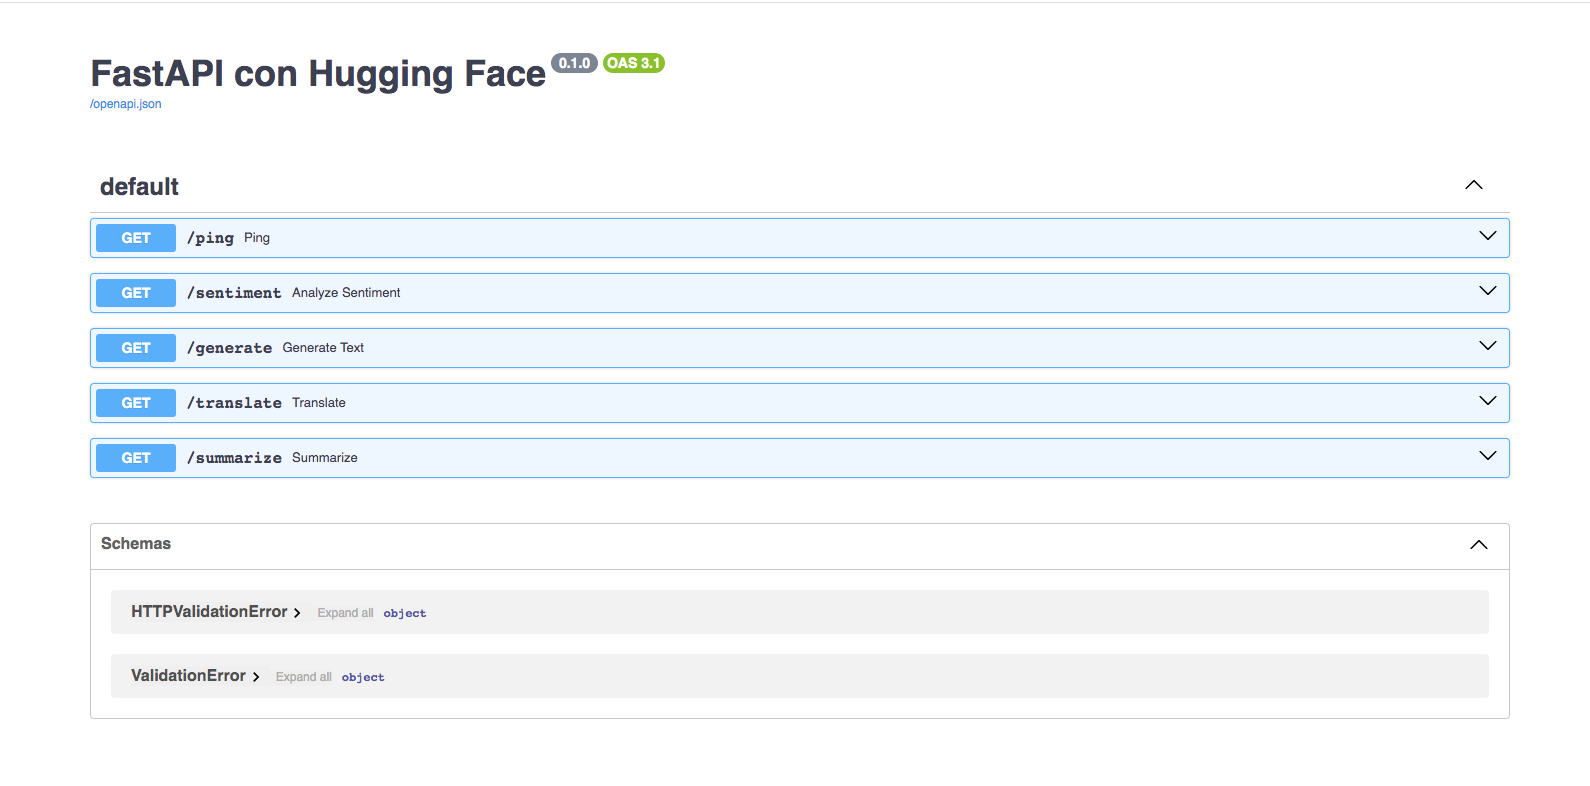

- Ping
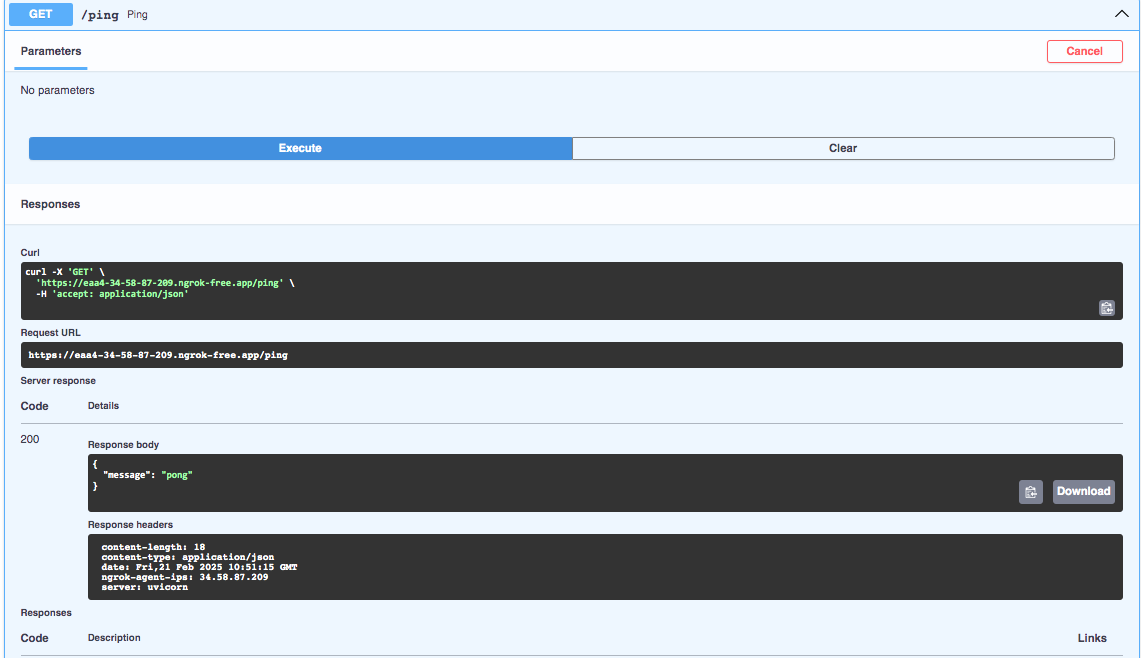
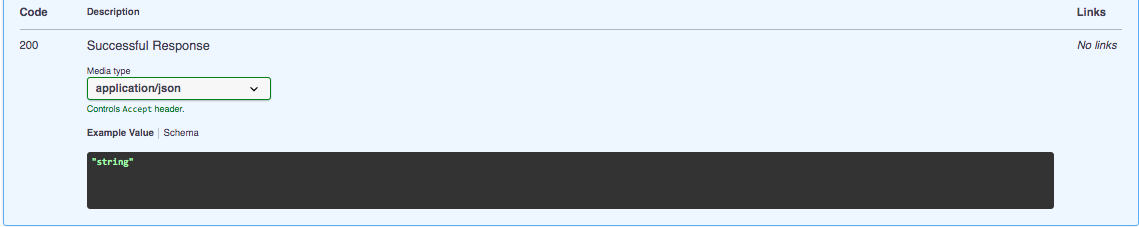

+ sentiment
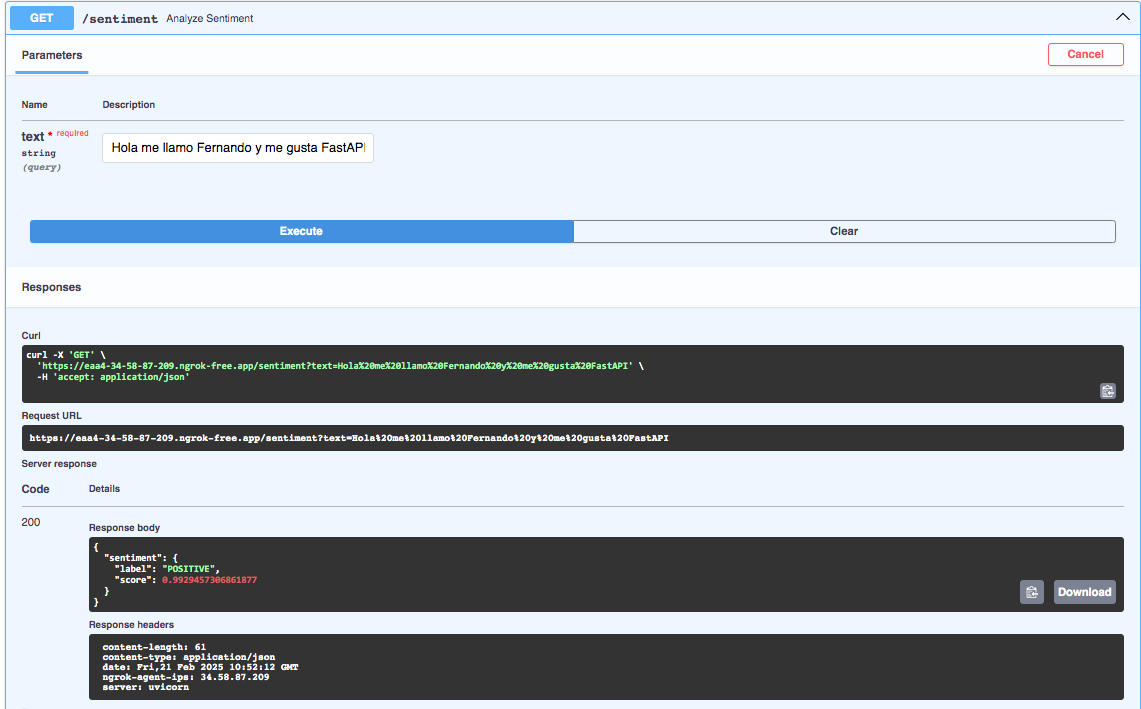
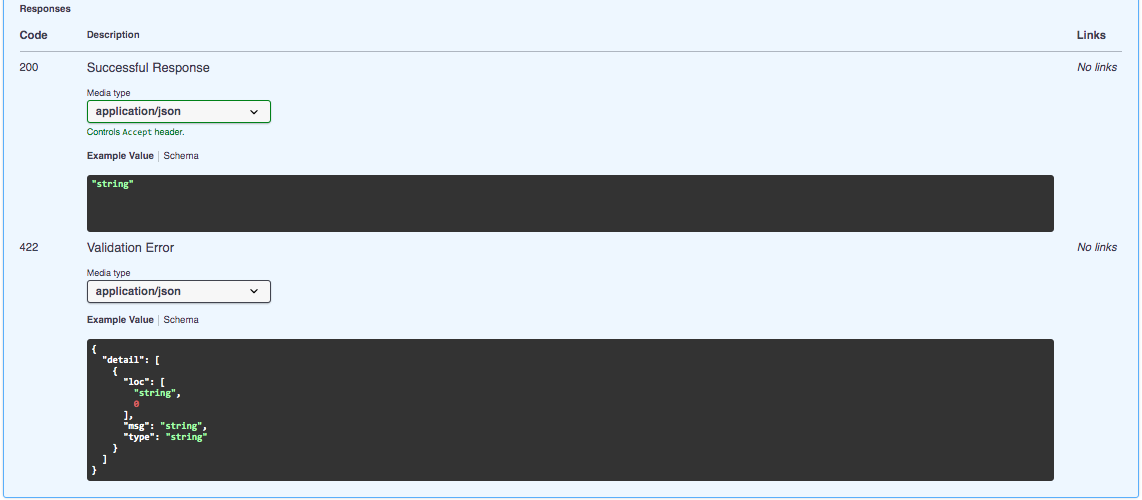

+ generate
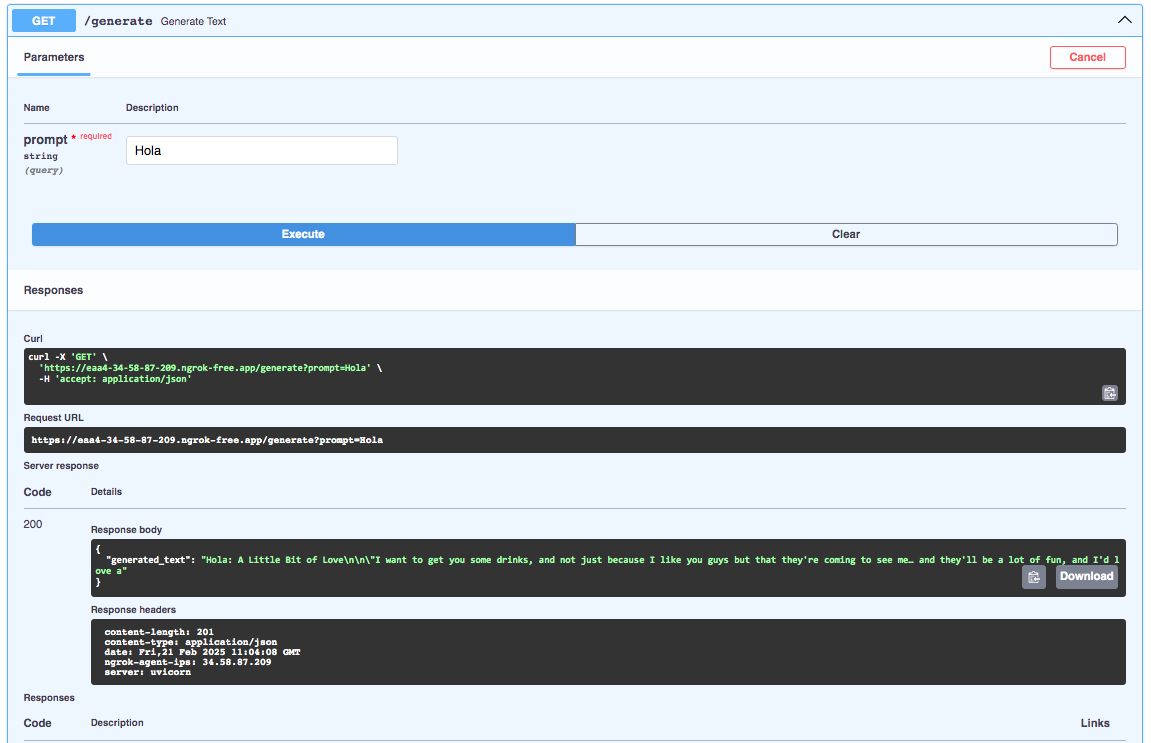
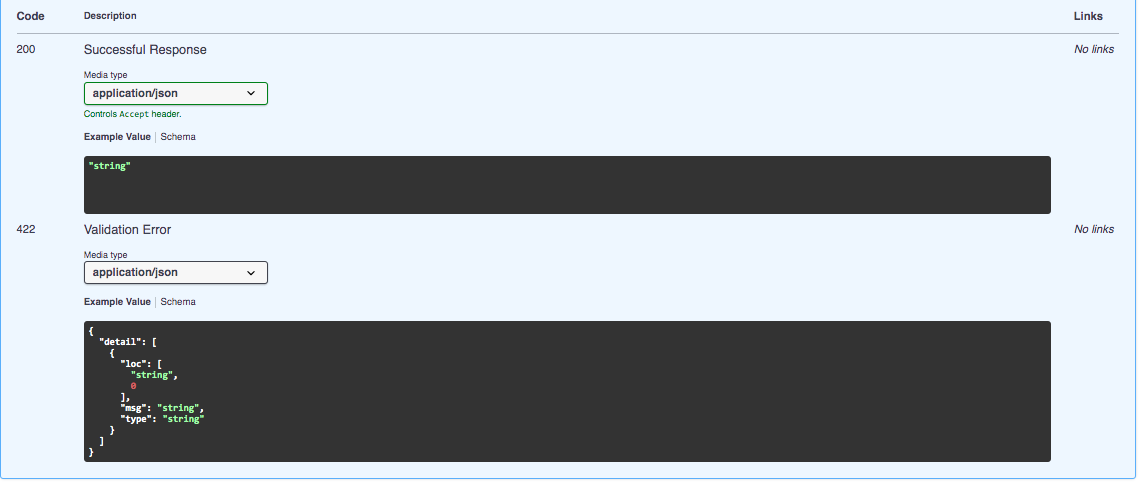

+ translate
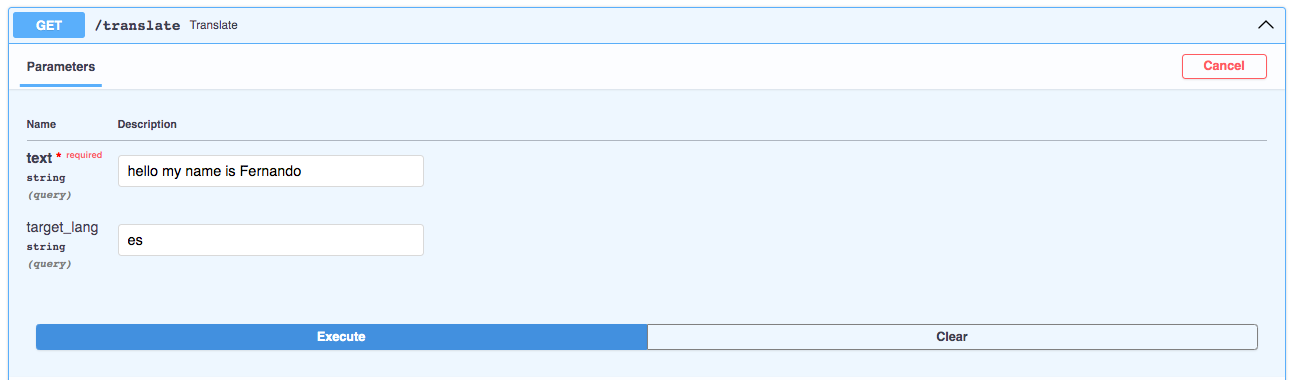
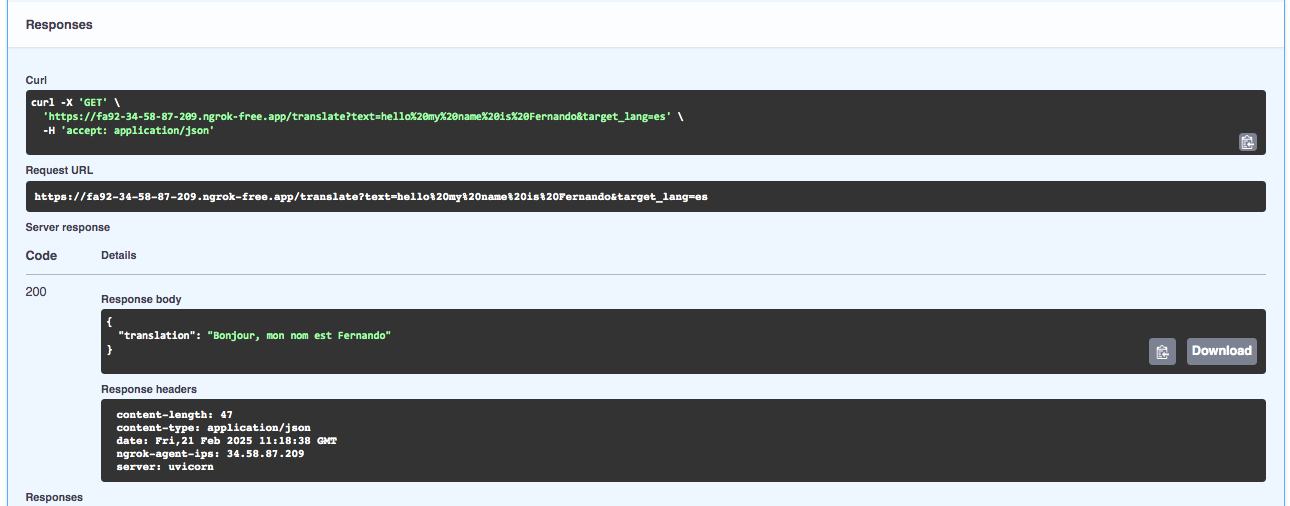
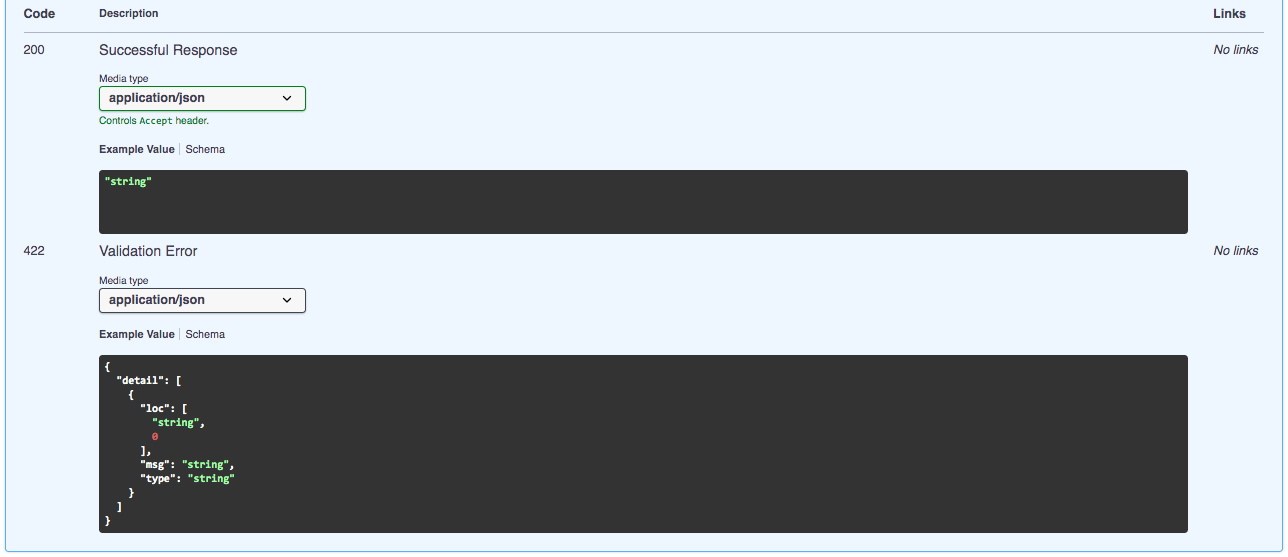

- summarize
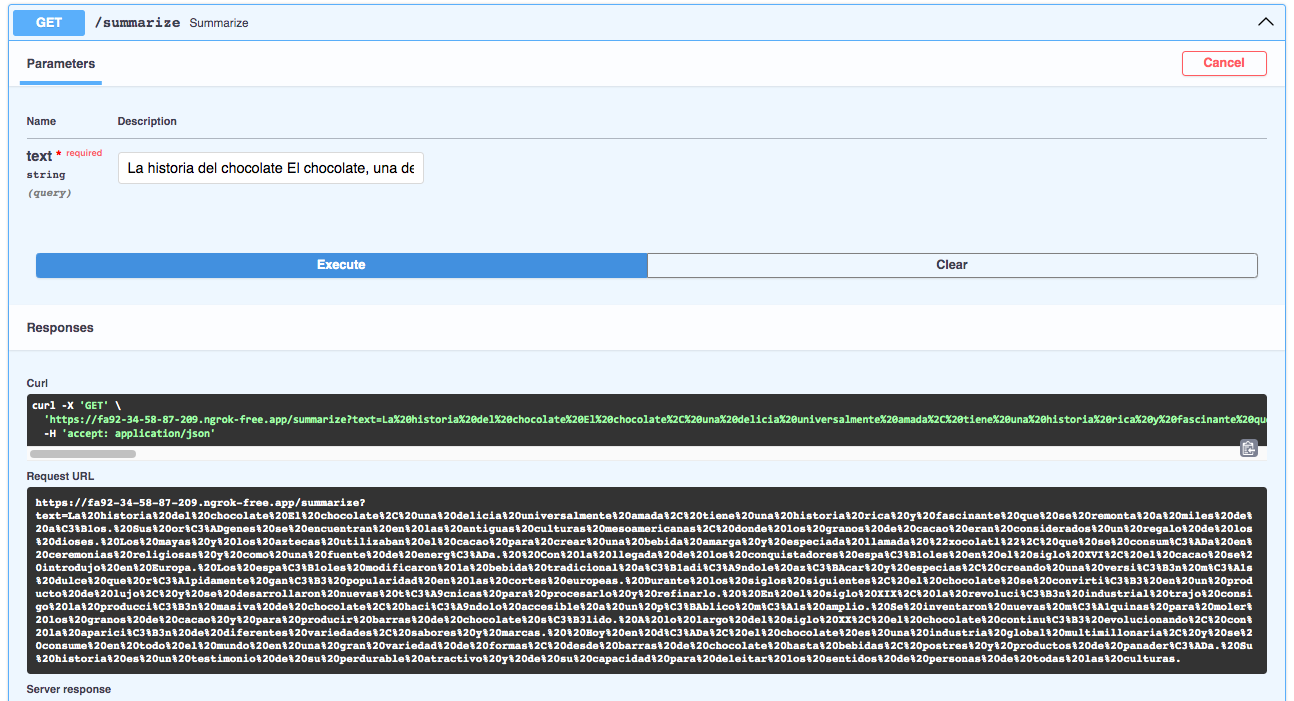
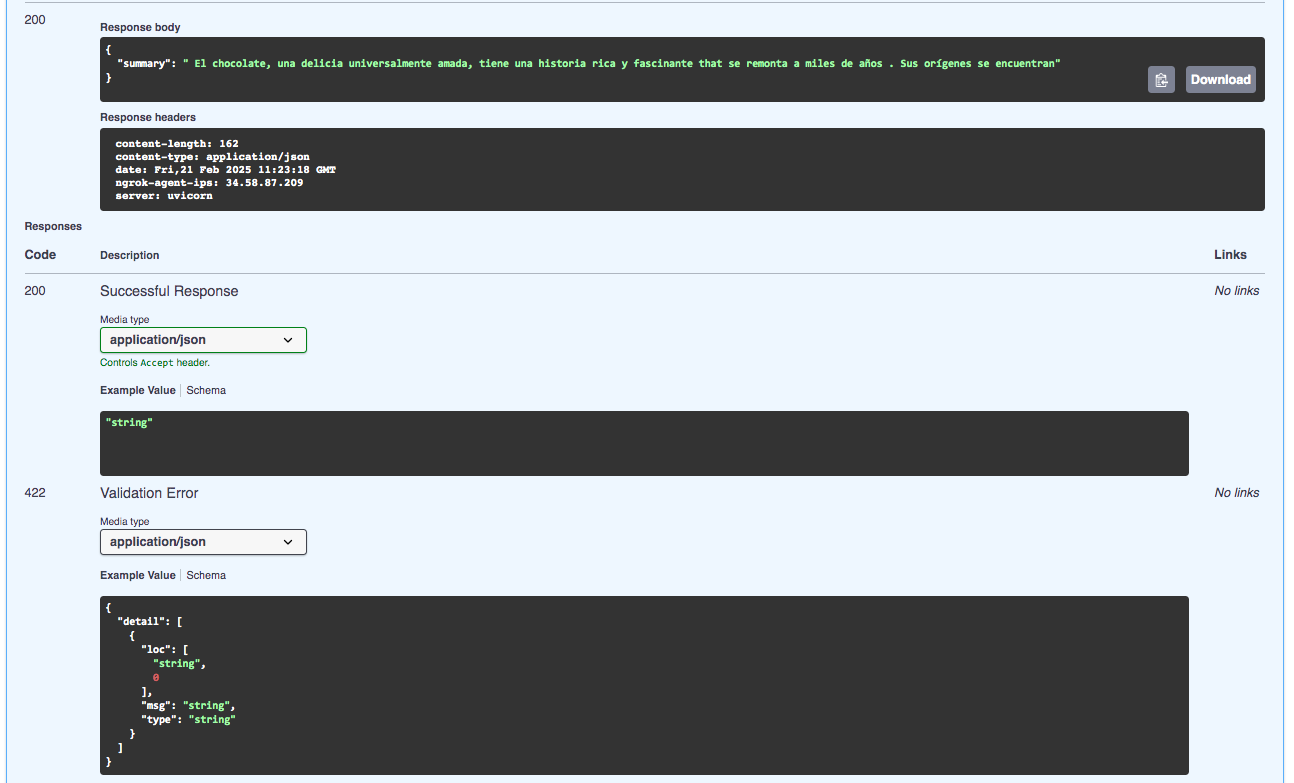

# 5 - Probar los endpoints con llamadas http

In [3]:
import requests

url = "https://fa92-34-58-87-209.ngrok-free.app/ping" #Poner URL ngrok hasta app. + /ping
response = requests.get(url)
print(response.json())

INFO:     34.58.87.209:0 - "GET /ping HTTP/1.1" 200 OK
{'message': 'pong'}


In [10]:
import requests

text_to_analyze = "Me gusta FastAPI"
url = f"https://fa92-34-58-87-209.ngrok-free.app/sentiment?text={text_to_analyze}" #Poner URL ngrok hasta app. + /sentiment?text={text_to_analyze}
response = requests.get(url)
print(response.json())

INFO:     34.58.87.209:0 - "GET /sentiment?text=Me%20gusta%20FastAPI HTTP/1.1" 200 OK
{'sentiment': {'label': 'POSITIVE', 'score': 0.9938042163848877}}


In [12]:
import requests

prompt = "Escribe un pequeño texto sobre FastAPI"
url = f"https://fa92-34-58-87-209.ngrok-free.app/generate?prompt={prompt}" #Poner URL ngrok hasta app. + /generate?prompt={prompt}
response = requests.get(url, params={"truncation": True, "max_length": 512})
print(response.json())

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


INFO:     34.58.87.209:0 - "GET /generate?prompt=Escribe%20un%20peque%C3%B1o%20texto%20sobre%20FastAPI&truncation=True&max_length=512 HTTP/1.1" 200 OK
{'generated_text': "Escribe un pequeño texto sobre FastAPI\n\nOpen Web Design with Spring\n\nSpring is often used to be a gateway to a web design framework. It's a nice way to take a piece of web development, build up"}


In [13]:
import requests

text_to_translate = "Hello, I like FastAPI"
url = f"https://fa92-34-58-87-209.ngrok-free.app/translate?text={text_to_translate}" #Poner URL ngrok hasta app. + translate?text={text_to_translate}
response = requests.get(url)
print(response.json())

INFO:     34.58.87.209:0 - "GET /translate?text=Hello,%20I%20like%20FastAPI HTTP/1.1" 200 OK
{'translation': "Bonjour, j'aime FastAPI"}


In [15]:
import requests


text_to_summarize = "Artificial intelligence (AI) is rapidly transforming the world around us, and one of the areas where its impact will be felt most profoundly is in the future of work. As AI continues to develop and become more sophisticated, it is likely to automate many tasks that are currently performed by humans. This could lead to significant job losses in certain sectors, but it could also create new opportunities in others."
url = f"https://fa92-34-58-87-209.ngrok-free.app/summarize?text={text_to_summarize}" #Poner URL ngrok hasta app. + summarize?text={text_to_summarize}
response = requests.get(url)
print(response.json())

INFO:     34.58.87.209:0 - "GET /summarize?text=Artificial%20intelligence%20(AI)%20is%20rapidly%20transforming%20the%20world%20around%20us,%20and%20one%20of%20the%20areas%20where%20its%20impact%20will%20be%20felt%20most%20profoundly%20is%20in%20the%20future%20of%20work.%20As%20AI%20continues%20to%20develop%20and%20become%20more%20sophisticated,%20it%20is%20likely%20to%20automate%20many%20tasks%20that%20are%20currently%20performed%20by%20humans.%20This%20could%20lead%20to%20significant%20job%20losses%20in%20certain%20sectors,%20but%20it%20could%20also%20create%20new%20opportunities%20in%20others. HTTP/1.1" 200 OK
{'summary': ' Artificial intelligence (AI) is rapidly transforming the world around us . One of the areas where its impact will be felt most profoundly is in the future of work . As AI continues to develop and become more sophisticated, it is likely to automate'}
